In [2]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from implementations import *
from support_code import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Load the training data into feature matrix, class labels, and event ids:

In [3]:
from proj1_helpers import *

In [4]:
from proj1_helpers import *
DATA_TRAIN_PATH = '../data/train.csv' # TODO: download train data and supply path here 
y, tX, ids = load_csv_data(DATA_TRAIN_PATH)


In [153]:
standardize_with_info


<function python2.standardize_with_info(x, means, stds)>

## Do your thing crazy machine learning thing here :) ...

In [243]:
tX4 = np.where(tX == -999, 0, tX)
weights, error = least_squares(y,tX)
tX3 = standardize(tX)
tx = np.c_[np.ones((y.shape[0], 1)), tX]
weigths4,error4 = least_squares(y,tx)
weights3, error3 = least_squares(y,tX3)
weights2, error2 = least_squares(y,tX2)
print(error3)
print(error2)
print(error4)

NameError: name 'tX2' is not defined

In [257]:
tX_new , y_new = balance_data_stupid (tX,y)
tX_new = np.where(tX_new == -999, 0, tX_new)

In [32]:

w, l = logistic_regression(y, tX, w, 1, 1/250000)
print(l)

2364941.9755437034


In [33]:
x = np.sort(tX3[:,29])

NameError: name 'tX3' is not defined

In [7]:
tX3 = np.where(tX == -999, 0, tX)

In [13]:
l, col = cleanse_data(tX3)
l.shape

1192.026

In [15]:
l_pol = build_poly(l,15)
weights, error = least_squares(y,l_pol)
loss_really(weights,y,l_pol)

0.179716

In [445]:
tx = build_poly(tX3,15)
weights, error = least_squares(y,tx)
loss_really(weights,y,tx)

0.33368

In [12]:
s = np.hstack([np.random.choice(np.where(labels == )[0], n, replace=False)
                      for l in np.unique(labels)])

SyntaxError: invalid syntax (<ipython-input-12-22fb630025d2>, line 1)

In [300]:
s = range(30)

array([ 38114,      0,      0,      0, 177457, 177457, 177457,      0,
            0,      0,      0,      0, 177457,      0,      0,      0,
            0,      0,      0,      0,      0,      0,      0,  99913,
        99913,  99913, 177457, 177457, 177457,      0])

In [256]:
ind1 = np.array(range(30))[np.sum(tX == -999,axis = 0) == 0]
ind2 = np.array(range(30))[np.sum(tX == -999,axis =0)< 200000]
ind3 = np.array(range(30))
ind3

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

In [30]:
s_0 = tX[tX[:,22] == 3]
s_0 = s_0[:,np.append(0,np.arange(30)[(np.sum(s_0 == -999, 0) == 0)])]
s_0.shape

(22164, 30)

In [146]:
STDS[0]

array([2.10287921, 0.84162931, 0.41952934, 1.10675864, 0.69329161,
       1.10675867, 0.25046685, 0.5815929 , 0.93670201, 0.3461081 ,
       1.23342423, 1.81734217, 0.28791311, 1.31084863, 1.81783473,
       0.64588685, 1.81099743, 0.43668822])

In [165]:
ratio = [Y[0].size,Y[1].size,Y[2].size,Y[3].size]
np.sum(np.array(ratio)*np.array(errors))/250000

0.16805322884206697

(array([ 8.63588512e-04, -7.57033689e-03, -3.41902180e-03, -3.24089644e-03,
         3.76808650e-02,  2.52682684e-03,  2.97388727e-03, -3.08771451e-01,
         1.25592951e-01,  9.29978063e-05,  2.28001374e-03, -2.24512867e-03,
         9.58703147e-03, -5.91163514e-03,  1.97458484e-04,  3.14410010e-03,
         2.16724766e-03, -9.82680769e-04, -1.04327298e-03, -1.22464530e-04,
        -2.64345974e-04,  2.30139943e-04]),
 0.384701623367693)

In [164]:
X, Y,missing_vectors = tree_test(tX,y)
weightss = []
degrees = []
errors = []
cols = []
Means = []
STDS = []

degress = np.arange(13,15)
lambdas = np.logspace(-12,-3,num = 40)
for i in range(4):
    x_n = X[i]
    y_n = Y[i]
    x,col = cleanse_data(x_n)
    x,mean,std = standardize(x)

    min_degree, min_weight,min_error = find_best(x,y_n,degress,lambdas,missing_vectors[i])
    print(min_error)
    
    weightss.append(min_weight)
    degrees.append(min_degree)
    errors.append(min_error)
    cols.append(col)
    Means.append(mean)
    STDS.append(std)

13
14
0.15704133720348312
13
14
0.19009543461439257
13
14
0.15803057375421878
13
14
0.16335740072202165


In [138]:
def find_best(tx,y,degrees, lambdas,missing_vector):
    min_degree = degress[0]
    min_weight = np.array({})
    min_error = 1
    for deg in degress:
        print(deg)
        tx_poly = build_poly(tx,deg)
        tx_poly = np.concatenate((missing_vector, tx_poly),1)
        tx_tr,tx_te,y_tr,y_te = split_data(tx_poly, y, 0.9,4)
        index = 0
        for lambda_ in lambdas:
            weights_r, error_r =  ridge_regression(y_tr,tx_tr,lambda_)
            error = loss_really(weights_r,y_te,tx_te)
            if error < min_error:
                min_degree = deg
                min_error = error
                min_weight = weights_r
    return min_degree, min_weight,min_error

[14, 15, 12, 12]

In [ ]:
errors = []
y_pred  = np.zeros(len(y))
for i in [0,3,6,9,12,15,18,21,24,27]:
    print(i)
    tx_test = tX3[:,[i,i+1,i+2]]
    tx3 = build_poly(tx_test,8)
    weights, error = least_squares(y,tx3)
    y_pred = y_pred + predict_labels(weights, tx3)
    errors.append(loss_really(weights,y,tx3))
    

In [ ]:
tX3 = np.where(tX == -999, 0, tX)
tX4 = standardize(tX4)

In [ ]:
tx4 = build_poly(tX3,10)

In [ ]:
tx5 = build_poly(tX4,10)

In [ ]:
weights4, error4 = least_squares(y,tx4)
loss_really(weights4,y,tx4)

In [ ]:
weights5, error5 = least_squares(y,tx5)
loss_really(weights5,y,tx5)

In [ ]:
weights_r, error_r =  ridge_regression(y,tx5,0)
loss_really(weights_r,y,tx5)

In [ ]:
weights, error = least_squares(y,tx)
loss_really(weights,y,tx)

In [ ]:
col_1 = ((tX[:,0] == -999) + 0).reshape(-1,1)
col_4 = ((tX[:,4] == -999) + 0).reshape(-1,1)
col_23 = ((tX[:,23] == -999) + 0).reshape(-1,1)
np.sum(col_23)
tx_final = np.concatenate((tx3,col_1,col_4,col_23),1)


In [ ]:
weight, error = least_squares(y,tx_final)
loss_really(weight,y,tx_final)


In [ ]:
weights, error = least_squares(y,tx4)
loss_really(weights,y,tx4)

(30, 30)

In [ ]:
gamma = 1
initial_w = np.zeros(tX.shape[1])

In [34]:
np.sum(y_new == 1)

85667

In [ ]:
calculate_loss_sigmoid(y,tX,w)

In [301]:
y_snew = (y_new+1)/2
gamma = 1e-2
tx_new,col  = cleanse_data(x_new)
tx_new , _ , _  = standardize(tx_new)
x_poly_new = build_poly(tx_new,5)
w = np.ones(x_poly_new.shape[1])

In [357]:
x_new,_ = cleanse_data(x_new)
x_new,_,_ = standardize(x_new)
tx = build_poly(x_new , 19)
weights, error = least_squares(y_new,tx)
loss_really(weights,y_new,tx)

0.2285025275972351

In [325]:
gamma = 0.0001

In [329]:
l, w = logistic_regression(y_snew,x_poly_new,w,100,gamma)
y_pred = predict_labels(w,x_poly_new)
np.sum(y_pred  == y_new )/len(y_new)

1.167968616773066
1.167695204252376
1.167317601162843
1.1669089716786785
1.1665173428967792
1.166142690337198
1.1657851640703063
1.1654403342474413
1.1651072172413335
1.1647821726581455


0.731713607758176

In [328]:
l, w = logistic_regression(y_new,tx3,w,5,gamma)

NameError: name 'tx3' is not defined

In [346]:
np.sum(y == y_pred)/len(y)

[autoreload of python2 failed: Traceback (most recent call last):
  File "/Users/kevinrizk/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/kevinrizk/opt/anaconda3/lib/python3.8/site-packages/IPython/extensions/autoreload.py", line 394, in superreload
    module = reload(module)
  File "/Users/kevinrizk/opt/anaconda3/lib/python3.8/imp.py", line 314, in reload
    return importlib.reload(module)
  File "/Users/kevinrizk/opt/anaconda3/lib/python3.8/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 604, in _exec
  File "<frozen importlib._bootstrap_external>", line 779, in exec_module
  File "<frozen importlib._bootstrap_external>", line 916, in get_code
  File "<frozen importlib._bootstrap_external>", line 846, in source_to_code
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  F

0.781556

In [190]:
y_pred = sigmoid(np.dot(tx3, w))
y_test = predict_labels2(w,tx3)
why = y_pred[y_test != y]

[0.23048654 0.06031774 0.41442101 ... 0.38123919 0.3989019  0.10384807]


10876

In [128]:
def predict_labels2(weights, data):
    """Generates class predictions given weights, and a test data matrix"""
    y_pred = sigmoid(np.dot(data, weights))
    print(y_pred)
    y_pred[np.where(y_pred <= 0.5)] = -1
    y_pred[np.where(y_pred > 0.5)] = 1
    
    return y_pred

In [461]:
index = 0 
errors = []
weightss = []
for lambda_ in lambdas:
    index = index+1
    print(index)
    weights_r, error_r =  ridge_regression(y_new,tx_new,lambda_)
    errors.append(loss_really(weights_r,y,tx3))
    weightss.append(weights_r)


NameError: name 'lambdas' is not defined

In [409]:
x_b, y_b  = balance_data_stupid(x_new,y_new,seed=2)

In [410]:
x_new = X[1]

array([[ 0.57920578,  0.26668787,  0.55865159, ...,  1.58093455,
        -0.91825712,  1.11188967],
       [ 0.36184056, -1.45084803, -0.0821965 , ...,  0.32598079,
         0.0743059 , -1.14609095],
       [ 0.21795906,  0.78879531, -0.85224342, ..., -1.28196302,
         1.37663222, -1.03001037],
       ...,
       [ 0.33518447, -1.17735852,  0.50451547, ...,  1.40526298,
         0.37196477,  3.4562818 ],
       [ 0.60120742, -2.53314765,  0.78292857, ...,  0.40064121,
        -0.08085084, -0.90839297],
       [ 0.31001996,  0.48237669,  0.12226513, ...,  0.55600075,
         1.32051169,  1.04823948]])

0

In [417]:
l,col = cleanse_data(x_b)
l,_,_ = standardize(l)
l_pol = build_poly(l,20)
tx_tr,tx_te,y_tr,y_te = split_data(l_pol, y_b, 0.9,4)

In [418]:
lambdas = np.logspace(-15,-2,num = 40)

In [419]:
index = 0 
errors = []
weightss = []
for lambda_ in lambdas:
    index = index+1
    print(index)
    weights_r, error_r =  ridge_regression(y_tr,tx_tr,lambda_)
    errors.append(loss_really(weights_r,y_te,tx_te))
    weightss.append(weights_r)


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40


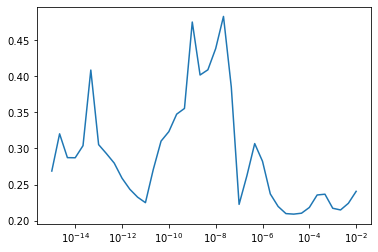

In [420]:
plt.semilogx(lambdas,errors)

In [421]:
weights = weightss[np.argmin(errors)]
np.argmin(errors)

31

In [422]:
loss_really(weights,y_te,tx_te)

0.2089875473741202

## Generate predictions and save ouput in csv format for submission:

In [195]:
col

[0, 1, 2, 3, 5, 8, 9, 13, 16, 19, 21, 23, 26, 29]

In [ ]:
t2 = np.zeros(30)
for i in range(30):
    t2[i] = np.sum(tX_test[:,i] == -999)

In [ ]:
tx_test = np.where(tX_test == -999, 0, tX_test)
tx_test = build_poly(tx_test,11)
col_1 = ((tX_test[:,0] == -999) + 0).reshape(-1,1)
col_4 = ((tX_test[:,4] == -999) + 0).reshape(-1,1)
col_23 = ((tX_test[:,23] == -999) + 0).reshape(-1,1)
tx_test_final = np.concatenate((tx_test,col_1,col_4,col_23),1)

In [413]:
tx_test = np.where(tX_test == -999, 0, tX_test)
tx_test = standardize(tx_test)
tx_test = build_poly(tx_test,15)
tx_test = standardize(tx_test,True)

In [180]:
l_test = np.where(tX_test == -999, 0, tX_test)
l_test = cleanse_data_col(l_test,col)
l_test = standardize(l_test)
l_pol_test = build_poly(l_test,15)

In [160]:
Y_pred = np.zeros(tX_test.shape[0])
X_t, _,_ = tree_test(tX_test,Y_pred)

In [161]:
 for i in range(4):
    X_t2 = cleanse_data_col(X_t[i],cols[i])
    X_t2 = standardize_with_info(X_t2,Means[i],STDS[i])
    X_poly = build_poly(X_t2,degrees[i])
    y_a = predict_labels(weightss[i], X_poly)
    Y_pred[ tX_test[:,22] == i] = y_a

In [162]:
OUTPUT_PATH = '../data/submission_good.csv'
create_csv_submission(ids_test, Y_pred, OUTPUT_PATH)

In [141]:
DATA_TEST_PATH = '../data/test.csv' # TODO: download train data and supply path here 
_, tX_test, ids_test = load_csv_data(DATA_TEST_PATH)


In [ ]:
tx_test = build_poly(tX_test,7)

In [ ]:
tX4_test = np.where(tX_test == -999, 0, tX_test)
tx4_test = build_poly(tX4_test,11)

In [44]:
OUTPUT_PATH = '../data/submission_new.csv' # TODO: fill in desired name of output file for submission
y_pred = predict_labels(weights, l_tx_test)
create_csv_submission(ids_test, Y_pred, OUTPUT_PATH)

NameError: name 'l_tx_test' is not defined

In [186]:
l_test2, col2= cleanse_data(np.where(tX_test == -999, 0, tX_test))

In [188]:
l_test2 == l_test 

[0, 1, 2, 3, 5, 8, 9, 13, 16, 19, 21, 23, 26, 29]